In [79]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx


In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis, skew
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [81]:
# Load the dataset and Display the first few rows of the dataset
data = pd.read_excel('/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx')
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [82]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [83]:
print('data_shape:',data.shape)

data_shape: (3424, 69)


In [84]:
# Checking for null values, unique counts, and data types
df_summary = data.describe(include='all').transpose()

In [85]:
data.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [86]:
# Basic information about the dataset and Check for missing values
def data_info():
    data_info = pd.DataFrame(index=data.columns)
    data_info['Data_type'] = data.dtypes
    data_info['Total_value'] = data.count()
    data_info['Null_count'] = data.isnull().sum()
    data_info['Unique_count'] = data.nunique()
    pd.set_option('display.max_rows', None)
    return data_info

data_info()

,Data_type,Total_value,Null_count,Unique_count
Ptid,object,3424,0,3424
Persistency_Flag,object,3424,0,2
Gender,object,3424,0,2
Race,object,3424,0,4
Ethnicity,object,3424,0,3
Region,object,3424,0,5
Age_Bucket,object,3424,0,4
Ntm_Speciality,object,3424,0,36
Ntm_Specialist_Flag,object,3424,0,2
Ntm_Speciality_Bucket,object,3424,0,3


**Check for Missing Data**

To identify missing values, we can visualize the missing data distribution across the dataset:

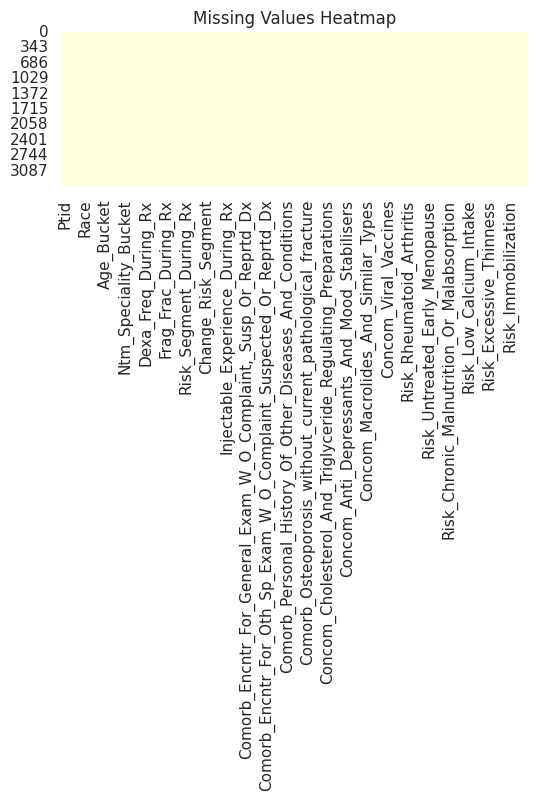

In [87]:
# Visualize missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

In [88]:
# Summary of categorical columns
print("\nCategorical Column Summary:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Column Summary:
Ptid: 3424 unique values
Persistency_Flag: 2 unique values
Gender: 2 unique values
Race: 4 unique values
Ethnicity: 3 unique values
Region: 5 unique values
Age_Bucket: 4 unique values
Ntm_Speciality: 36 unique values
Ntm_Specialist_Flag: 2 unique values
Ntm_Speciality_Bucket: 3 unique values
Gluco_Record_Prior_Ntm: 2 unique values
Gluco_Record_During_Rx: 2 unique values
Dexa_During_Rx: 2 unique values
Frag_Frac_Prior_Ntm: 2 unique values
Frag_Frac_During_Rx: 2 unique values
Risk_Segment_Prior_Ntm: 2 unique values
Tscore_Bucket_Prior_Ntm: 2 unique values
Risk_Segment_During_Rx: 3 unique values
Tscore_Bucket_During_Rx: 3 unique values
Change_T_Score: 4 unique values
Change_Risk_Segment: 4 unique values
Adherent_Flag: 2 unique values
Idn_Indicator: 2 unique values
Injectable_Experience_During_Rx: 2 unique values
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 2 unique values
Comorb_Encounter_For_Immunization: 2 unique values
Comorb_Encntr_For_General_E

In [89]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

**Visualizing Data Distributions**

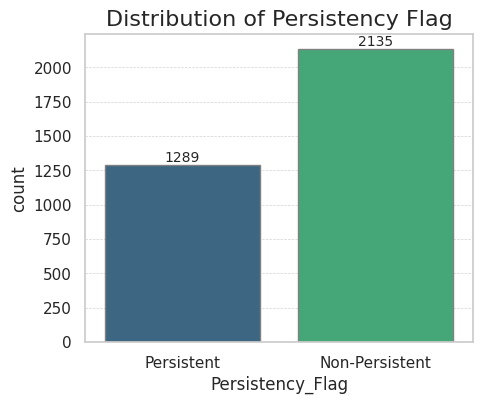

In [90]:
# Distribution of the target variable (Persistency_Flag)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
ax=sns.countplot(x='Persistency_Flag', data=data, palette="viridis",edgecolor='gray')
plt.title("Distribution of Persistency Flag", fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, labels=[f'{int(val)}' for val in container.datavalues])
plt.show()

* The above chart represents the distribution of a "Persistency Flag" variable, showing two categories: Persistent and Non-Persistent. Based on the counts displayed, there are more Non-Persistent instances (2135) than Persistent ones (1289).
  
**Hypothesis:** The majority of subjects in the dataset show non-persistent behavior, indicating a higher prevalence of non-adherence or irregularity in the target variable related to persistency.

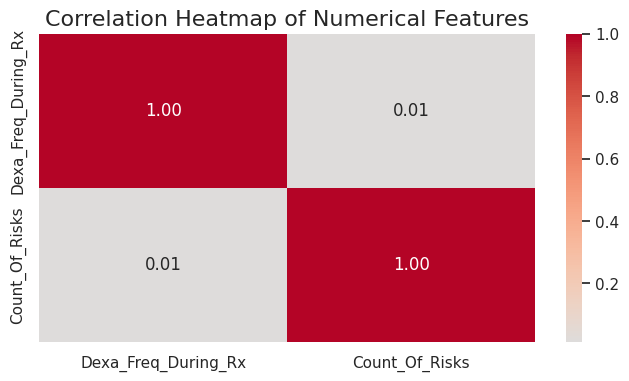

In [91]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(8, 4))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

* The heatmap shows the correlation between two numerical features: "Dexa_Freq_During_Rx" and "Count_Of_Risks." The correlation coefficient is 0.01, indicating a very weak relationship between these two variables.

**Hypothesis:** There is no significant correlation between the frequency of DEXA scans during treatment and the count of risks, suggesting that changes in the frequency of scans do not have a substantial impact on the number of risks observed.

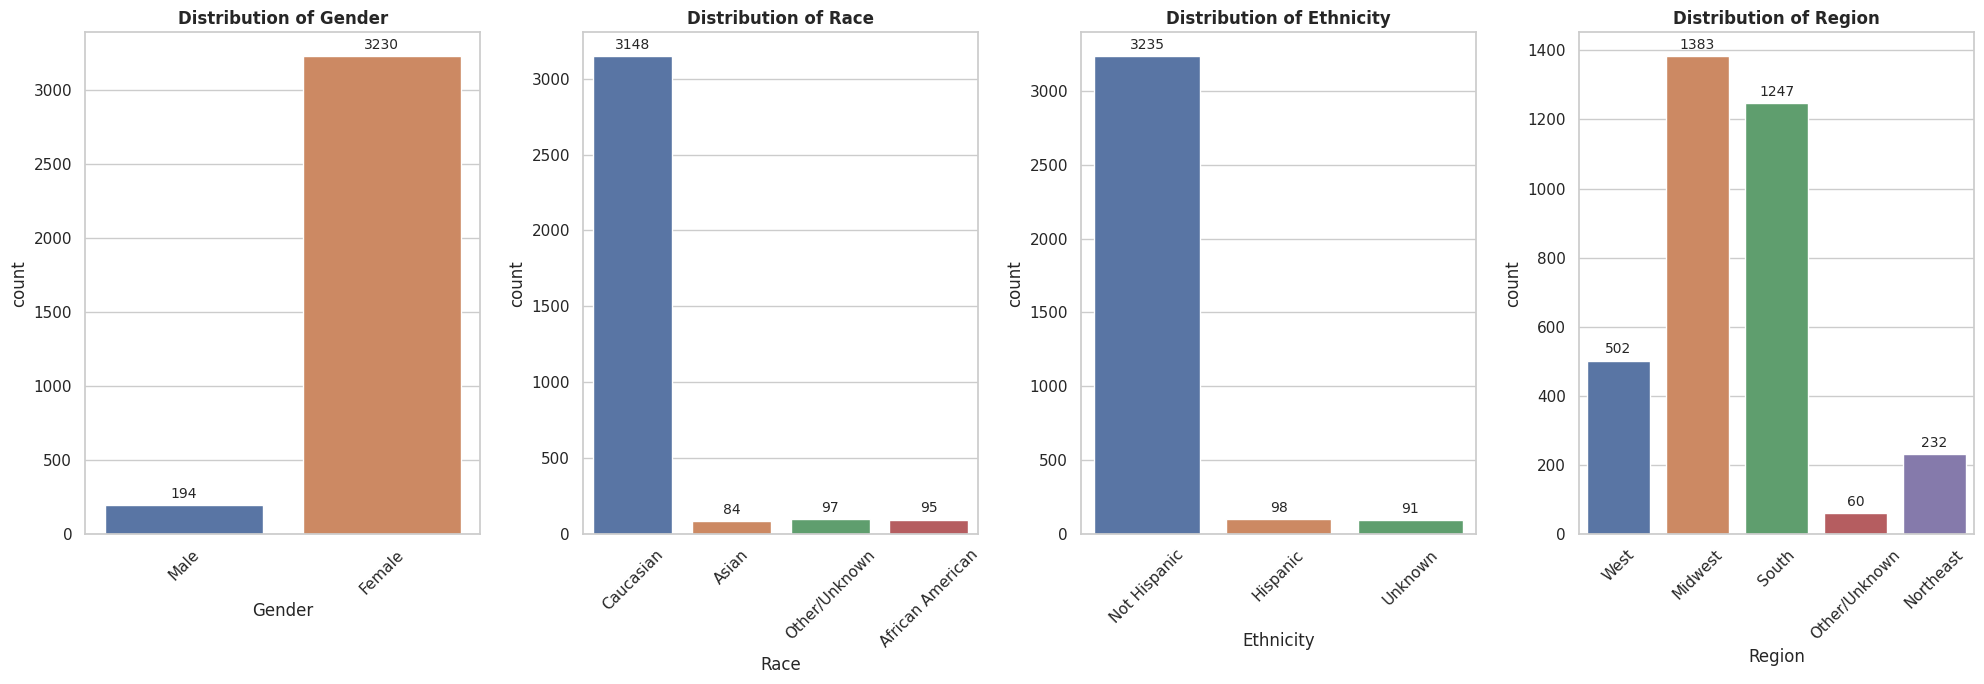

In [92]:
# Subplots for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 7))

# List of categorical columns to plot
categorical_columns = ['Gender', 'Race', 'Ethnicity', 'Region']

# Loop through the columns and plot on each subplot
for i, col in enumerate(categorical_columns):
    bar_plot = sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
    for bar in bar_plot.containers:
        bar_plot.bar_label(bar, fmt='%d', padding=3, fontsize=10)

plt.tight_layout()
plt.show()


The charts show the distributions of Gender, Race, Ethnicity, and Region in the dataset. Key observations are:

**Gender:** The majority are Female (3230) compared to Male (194).

**Hypothesis:** The dataset is predominantly female, which might influence the analysis of gender-specific trends.

**Race:** Most individuals are Caucasian (3148), with smaller groups for Asian (84), Other/Unknown (97), and African American (95).

**Hypothesis:** Race distribution is heavily skewed towards Caucasians, which may limit insights into other racial groups.

**Ethnicity:** Most individuals are Not Hispanic (3235), with few Hispanic (98) and Unknown (91).

**Hypothesis:** Ethnicity differences are minimal, as the majority are Not Hispanic.

**Region:** The largest groups are from the Midwest (1383) and South (1247), followed by West (502), Northeast (232), and Other/Unknown (60).

**Hypothesis:** Regional trends are more likely to reflect data from the Midwest and South, given their larger representation.

These distributions suggest potential biases in the dataset, which could affect generalizability.

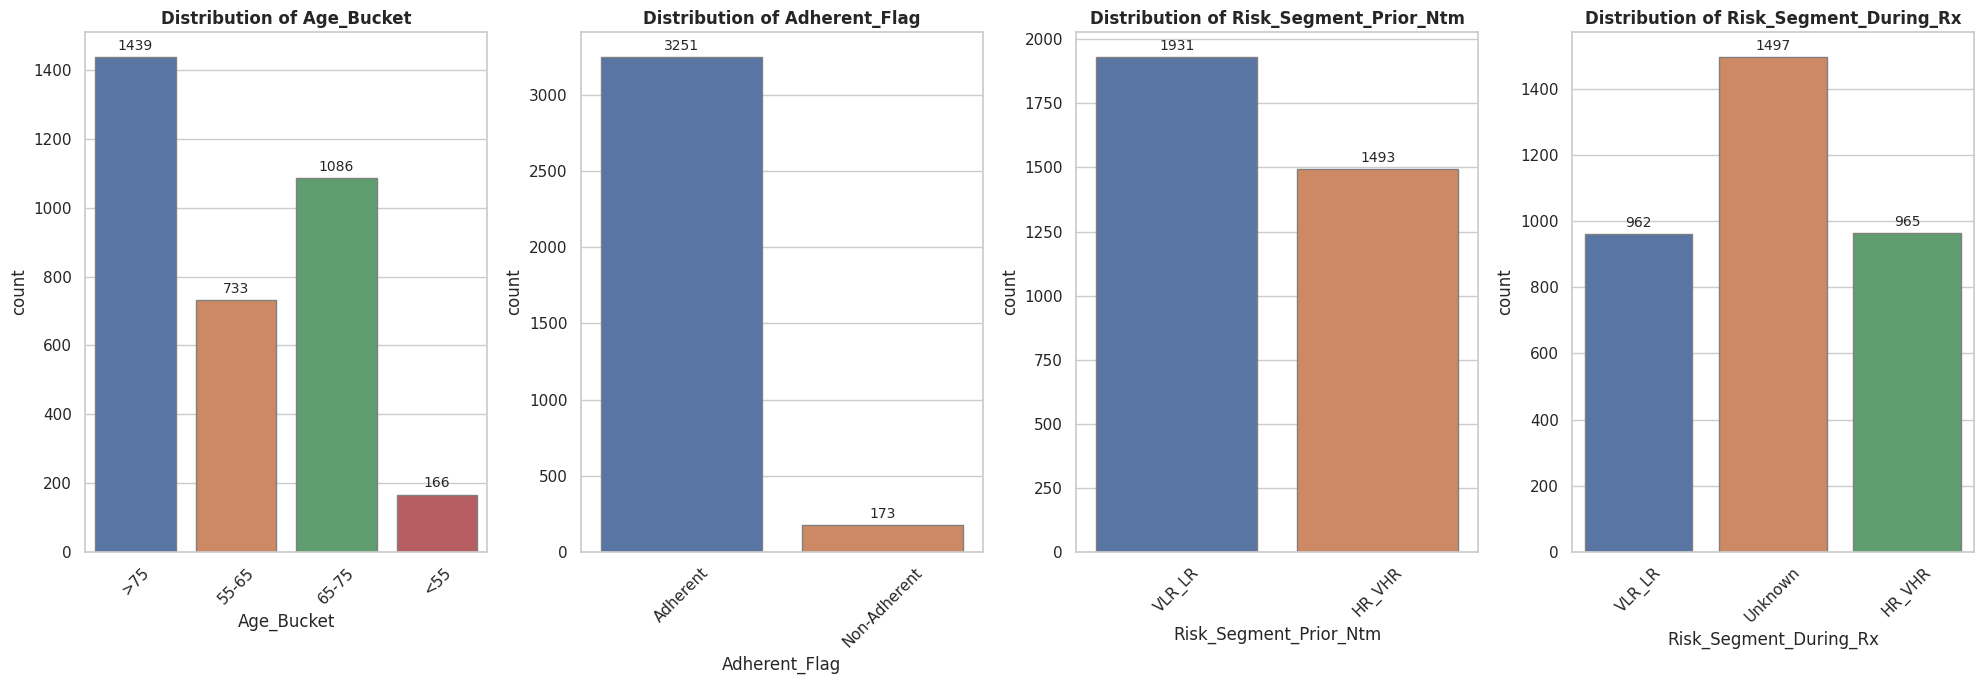

In [93]:
# Subplots for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 7))

# List of categorical columns to plot
categorical_columns = ['Age_Bucket', 'Adherent_Flag', 'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']

# Loop through the columns and plot on each subplot
for i, col in enumerate(categorical_columns):
    # Create the countplot
    bar_plot = sns.countplot(x=data[col], ax=axes[i], edgecolor='gray')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
   
    for bar in bar_plot.containers:
        bar_plot.bar_label(bar, fmt='%d', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

Here are the simple hypotheses based on the charts:

**Age Bucket:** Most patients are older adults (>75 years), followed by 65-75 years. Very few are under 55.

**Hypothesis:** Age impacts adherence and risk segments, with older adults likely dominating trends.

**Adherence Flag:** The majority are adherent, with very few being non-adherent.

**Hypothesis:** Adherence is generally high, but specific factors may influence non-adherence.

**Risk Segment (Prior NTM):** More patients are in the "Very Low Risk - Low Risk (VLR-LR)" group compared to "High Risk - Very High Risk (HR-VHR).

**Hypothesis:** Prior risk levels lean towards lower categories, possibly reflecting effective prior interventions.

**Risk Segment (During Rx):** A significant portion of data has "Unknown" risk, followed by VLR-LR and HR-VHR groups almost equally.

**Hypothesis:** Risk categorization during treatment may need better data quality or more clarity in recording.

These trends could guide targeted interventions to improve outcomes.

**Barplots to Show the Relationship Between Categorical Columns and Target Variable:**

check how the categorical features relate to the target variable (Persistency_Flag). This could help us understand if some categories are associated with higher or lower persistency.

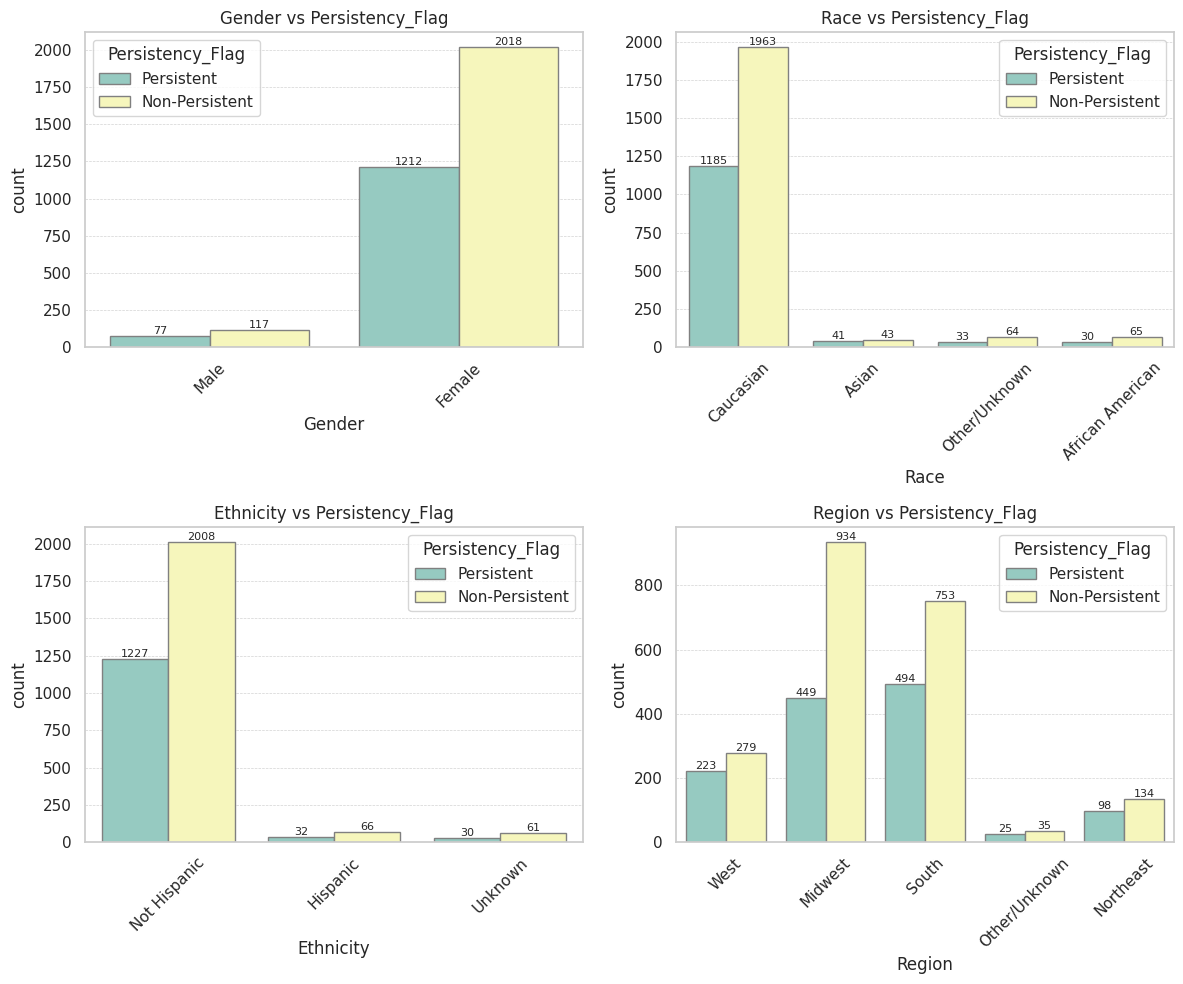

In [94]:
plt.figure(figsize=(12, 10))

# Gender vs Persistency_Flag
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='Gender', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Gender vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')  
plt.xticks(rotation=45)  
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d',fontsize=8) 

# Race vs Persistency_Flag
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='Race', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Race vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=45) 
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d',fontsize=8)  

# Ethnicity vs Persistency_Flag
plt.subplot(2, 2, 3)
ax3 = sns.countplot(x='Ethnicity', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Ethnicity vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d',fontsize=8) 

# Region vs Persistency_Flag
plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Region', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Region vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', fontsize=8)  

plt.tight_layout()
plt.show()




Based on the visualizations provided, the relationship between the Persistency_Flag (Persistent and Non-Persistent) and various demographic attributes like Gender, Race, Ethnicity, and Region is analyzed in detail. The observations and hypotheses are as follows:

**1. Gender vs Persistency_Flag:**
Females dominate the dataset, with a significantly higher count of both Persistent (1,212) and Non-Persistent (2,018) cases compared to males.
For males, the gap between Persistent (77) and Non-Persistent (117) cases is relatively smaller.

**Hypothesis:**
Gender differences in healthcare-seeking behavior might explain this disparity. Women are generally more likely to seek healthcare but may face challenges maintaining adherence due to factors such as caregiving responsibilities, medication side effects, or systemic barriers in healthcare access.

**2. Race vs Persistency_Flag:**
The majority of cases belong to the Caucasian category, with a higher count of Non-Persistent (1,963) compared to Persistent (1,185).
Other racial groups, such as Asian, African American, and Other/Unknown, have significantly fewer cases, with a consistent trend of Non-Persistent dominating.

**Hypothesis:**
Racial disparities in healthcare delivery may influence medication persistency. Factors such as systemic inequities, cultural perceptions of medication adherence, and trust in the healthcare system might impact adherence rates among different racial groups.

**3. Ethnicity vs Persistency_Flag:**
Among Non-Hispanic individuals, Non-Persistent cases (2,008) significantly outnumber Persistent cases (1,227).
For Hispanic and Unknown ethnicity groups, there are fewer total cases, but the trend of Non-Persistent outweighing Persistent persists.

**Hypothesis:**
Ethnicity may play a role in medication adherence due to cultural, social, or access-related factors. For example, Non-Hispanic individuals may be more likely to start treatment but less likely to maintain adherence, potentially due to healthcare accessibility or socioeconomic challenges.

**4. Region vs Persistency_Flag:**
In all regions (West, Midwest, South, Northeast, Other/Unknown), Non-Persistent cases dominate.
The Midwest and South regions have the highest counts of both categories, with a significant gap favoring Non-Persistent cases.

**Hypothesis:**
Geographic location might influence medication persistency due to disparities in healthcare access, regional healthcare policies, or socioeconomic differences. For example, rural areas in regions like the Midwest and South may face more barriers to consistent medication access and adherence.

**Data Gaps**
The presence of Unknown categories across several demographic groups suggests that missing data may contribute to variability in persistency trends. This is particularly evident in the Ethnicity, Race, and Region attributes, where "Unknown" entries are common.

**Conclusion:**
These visualizations highlight a recurring pattern where Non-Persistent individuals dominate across multiple demographic attributes, including gender, race, ethnicity, and region. Specific groups such as Caucasian, females, and individuals in the South and Midwest regions—exhibit significant imbalances favoring non-persistence.



**Heatmap of Categorical Features (using Cramér's V):**
we can compute the association between categorical variables using Cramér's V, which gives a measure of association between categorical variables. The heatmap will show us which categorical features are strongly related to each other.

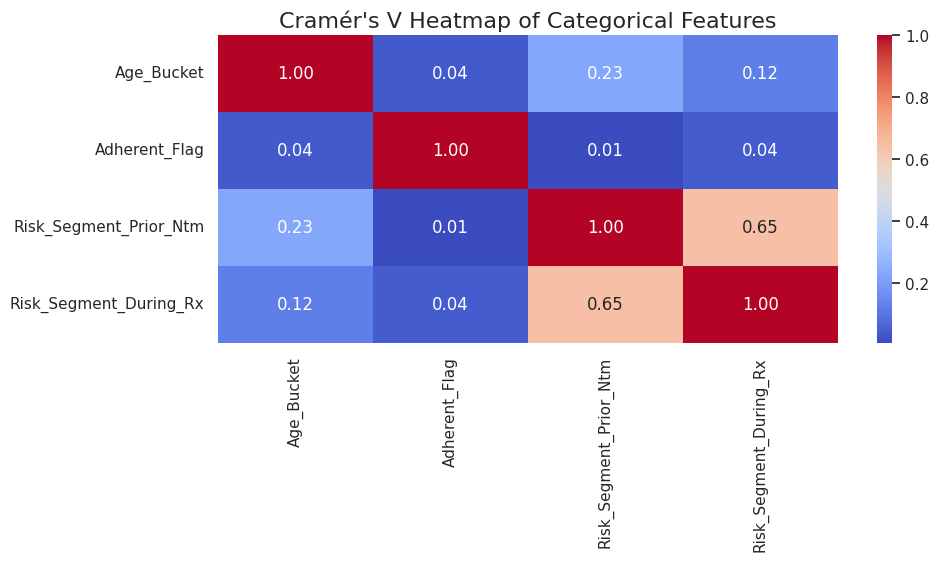

In [95]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create an empty dataframe for Cramér's V scores
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Plot heatmap of Cramér's V
plt.figure(figsize=(10, 4))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Heatmap of Categorical Features", fontsize=16)
plt.show()


**Age Bucket vs. Others:** Age group shows a weak relationship with adherence (0.04) and risk segments (0.23 for prior risk, 0.12 for during treatment).

**Hypothesis:** Age has minimal influence on adherence and risk levels.

**Adherence Flag:** Very low correlation with other variables (max 0.04).

**Hypothesis:** Adherence is largely independent of age or risk segments.

**Risk Segment (Prior NTM vs. During Rx):** Strong relationship (0.65).

**Hypothesis:** Prior and during-treatment risk segments are closely linked, indicating a trend continuation in risk classification.

This suggests risk-related factors might have interdependencies, while age and adherence seem more independent.

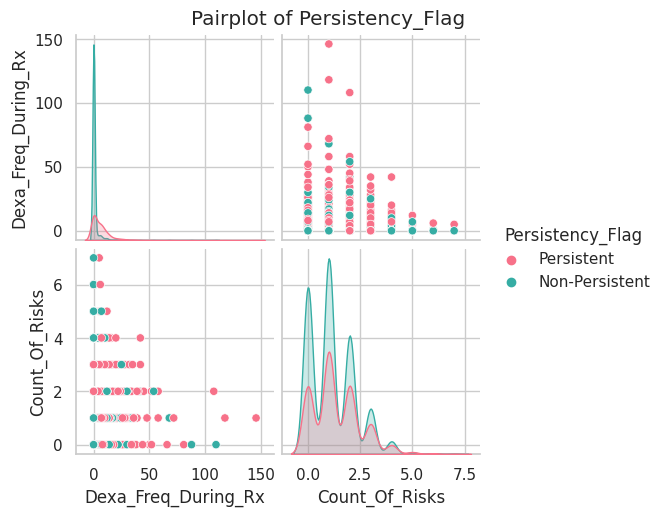

In [96]:
selected_features = ['Dexa_Freq_During_Rx', 'Count_Of_Risks',  'Persistency_Flag']
sns.pairplot(data[selected_features], hue="Persistency_Flag", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Persistency_Flag", y=1.02)  
plt.show()


 # Check for Distribution and Outliers



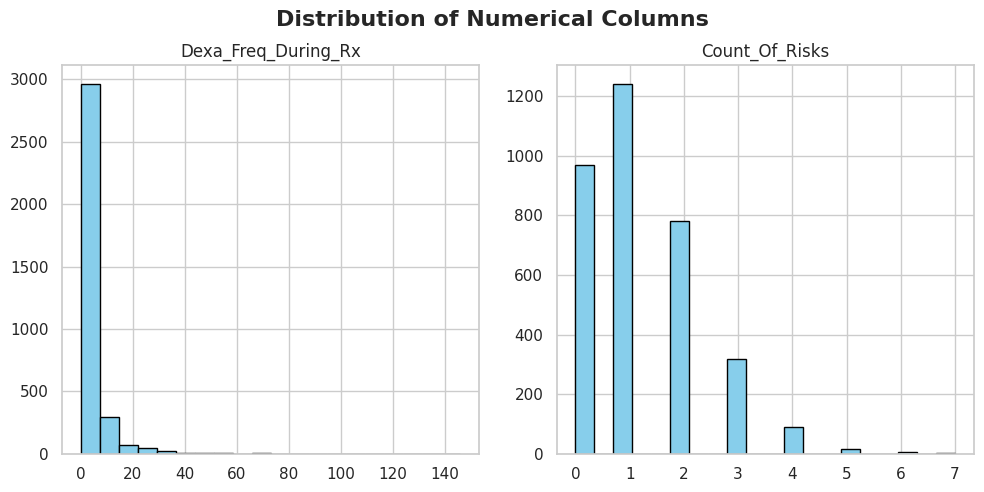

In [97]:
# Visualizing the distribution of numerical columns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black', grid=True)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.suptitle("Distribution of Numerical Columns", fontsize=16, y=0.98, fontweight='bold')

plt.show()

#  Outlier Detection:
# 1. IQR Method

In [98]:
# Detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply to numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Dexa_Freq_During_Rx: 460
Outliers in Count_Of_Risks: 8


In [99]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# 2. Isolation Forest

**How It Works**
* Isolation Forest is a machine learning algorithm designed for anomaly detection.
* It works by randomly partitioning the data. Points that require fewer splits to isolate are considered outliers.
* The contamination parameter determines the expected proportion of outliers in the dataset.

In [100]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42) 
outlier_labels = iso.fit_predict(data[numerical_cols])

# Identify outliers
data['Outlier'] = outlier_labels
print(data['Outlier'].value_counts())

Outlier
 1    3252
-1     172
Name: count, dtype: int64


The Isolation Forest identified 172 records as outliers across all numerical columns. This is fewer than the IQR method for "Dexa_Freq_During_Rx," which flagged 460 outliers.

**Strengths of Isolation Forest**
* Handles skewed and non-Gaussian distributions well.
* Considers multidimensional interactions between variables, unlike the univariate IQR method.

In [101]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Outlier
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,1
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,1
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,2,1
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,1


# 3. Descriptive Statistics Analysis
* Checking for unusual/incoherent values for each column. (Ex: str values in int columns).Checking for unusual/incoherent values for each column. (Ex: str values in int columns). 

In [102]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])# select all columns by the type, in this case, numeric  
categorical_columns = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])# exclude all columns by the type, in this case, numeric

In [103]:
print(numerical_columns['Dexa_Freq_During_Rx'].sort_values().unique(), end='\n\n')
print(numerical_columns['Count_Of_Risks'].sort_values().unique(), end='\n\n')

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36
  37  38  39  40  42  44  45  48  50  52  54  58  66  68  69  72  81  88
 108 110 118 146]

[0 1 2 3 4 5 6 7]



No incoherent values for the numerical variables

In [104]:
# Define the function to calculate descriptive statistics
def descriptive_numerical_columns(data, numerical_columns):
    # Create an empty list to store the result dictionaries
    result = []
    
    # Loop through each numerical column
    for col in numerical_columns:
        # Calculate the statistics for each column
        column_stats = {
            'attributes': col,
            'min': data[col].min(),
            'max': data[col].max(),
            'range': data[col].max() - data[col].min(),
            'mean': data[col].mean(),
            'median': data[col].median(),
            'std': data[col].std(),
            'skew': skew(data[col].dropna()),  # Drop NA values before calculating skew
            'kurtosis': kurtosis(data[col].dropna())  # Drop NA values before calculating kurtosis
        }
        
 # Append the result dictionary to the result list
        result.append(column_stats)
    
# Convert the result list to a DataFrame
    stats_data = pd.DataFrame(result)
    
    return stats_data

# data is your DataFrame, and 'numerical_columns' is a list of your numerical column names
numerical_columns = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']  
result = descriptive_numerical_columns(data, numerical_columns)
(result)


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Dexa_Freq_During_Rx,0,146,146,3.016063,0.0,8.136545,6.805747,74.647502
1,Count_Of_Risks,0,7,7,1.239486,1.0,1.094914,0.879405,0.897420


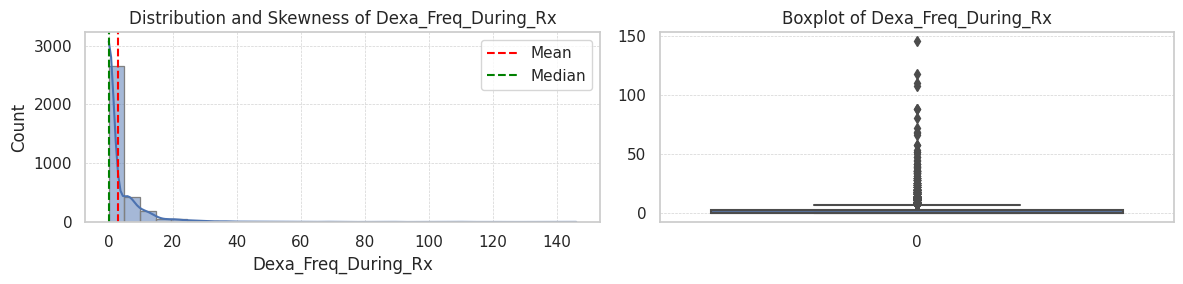

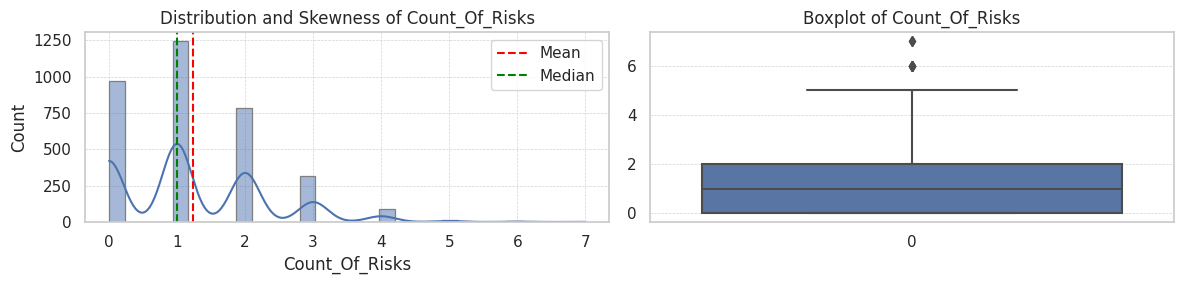

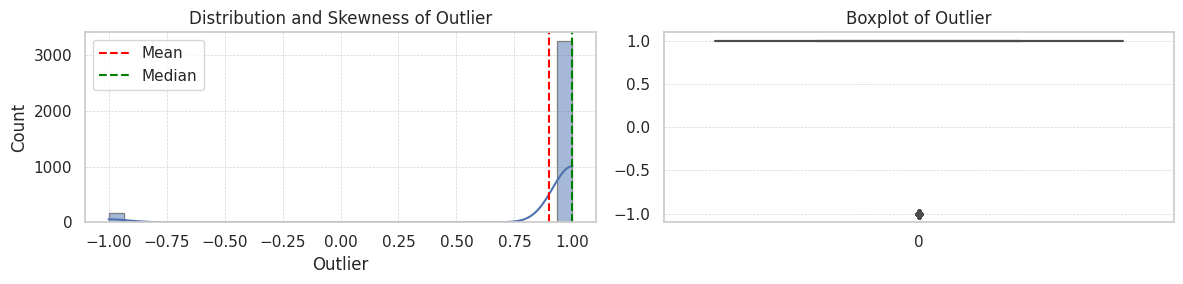

In [105]:
# Visualize numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(12, 3))

 # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, edgecolor='gray')
    plt.axvline(data[col].mean(), color="red", linestyle="--", label="Mean")
    plt.axvline(data[col].median(), color="green", linestyle="--", label="Median")
    plt.title(f'Distribution and Skewness of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='both')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
  
    plt.tight_layout()
    plt.show()

# 1. Handling Outliers:
Outliers can significantly distort statistical analyses. Below are some common techniques to handle outliers:

**Z-score:** This method checks how far a data point is from the mean in terms of standard deviations. Data points with a Z-score greater than 3 or less than -3 are usually considered outliers.

**IQR (Interquartile Range)**: Outliers can also be detected using the IQR method. Any data point that falls below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is considered an outlier.

# 2. Handling Skewness:
**Log Transformation**: A log transformation can reduce positive skewness.

**Square Root or Cube Root Transformation:** These can also reduce skewness in the data, especially when the data has a high positive skew.

**Box-Cox Transformation:**  A statistical transformation that can be applied to make the data more normally distributed.

Outliers for Dexa_Freq_During_Rx_Log: 42
Outliers for Count_Of_Risks_Sqrt: 0
Skewness for Dexa_Freq_During_Rx_Log: 1.3300610554584147
Skewness for Count_Of_Risks_Sqrt: -0.32745539912302396


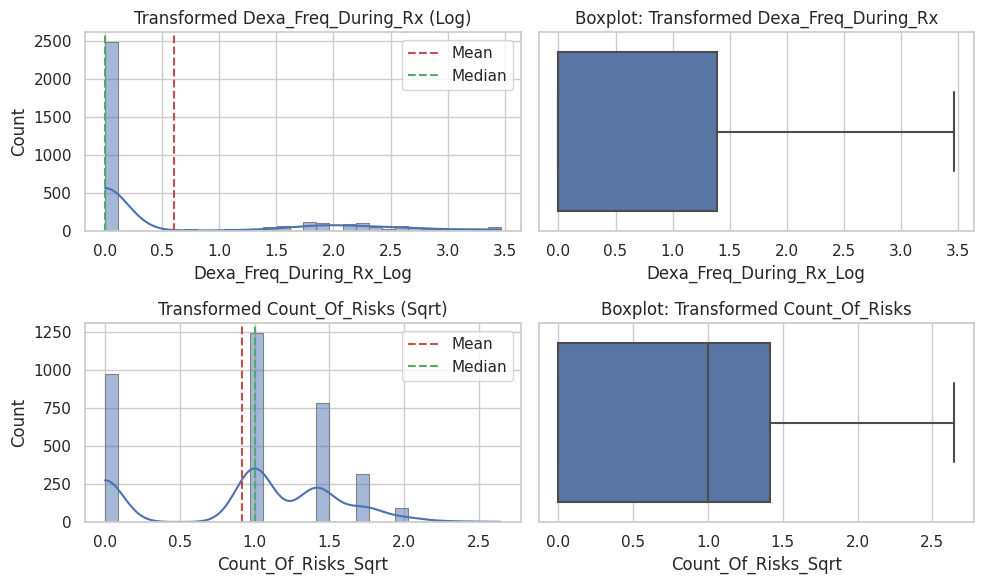

In [106]:
# Dexa_Freq_During_Rx and Count_Of_Risks

# Step 1: Analyze Skewness and Transform Data
data['Dexa_Freq_During_Rx_Log'] = np.log1p(data['Dexa_Freq_During_Rx'])
data['Count_Of_Risks_Sqrt'] = np.sqrt(data['Count_Of_Risks'])

# Step 2: Outlier Treatment using IQR
def treat_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify and count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Outliers for {column}: {outliers.shape[0]}')
    # Capping outliers
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

data = treat_outliers(data, 'Dexa_Freq_During_Rx_Log')
data = treat_outliers(data, 'Count_Of_Risks_Sqrt')

# Step 3: Skewness Calculation
dex_skew = skew(data['Dexa_Freq_During_Rx_Log'].dropna())
count_risks_skew = skew(data['Count_Of_Risks_Sqrt'].dropna())

print(f'Skewness for Dexa_Freq_During_Rx_Log: {dex_skew}')
print(f'Skewness for Count_Of_Risks_Sqrt: {count_risks_skew}')

# Step 4: Visualization Post-Processing
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Distribution Plots
sns.histplot(data['Dexa_Freq_During_Rx_Log'], kde=True, ax=axes[0, 0], bins=30, edgecolor='gray')
axes[0, 0].set_title("Transformed Dexa_Freq_During_Rx (Log)")
# Adding mean and median lines
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].median(), color='g', linestyle='--', label='Median')
axes[0, 0].legend()

sns.histplot(data['Count_Of_Risks_Sqrt'], kde=True, ax=axes[1, 0], bins=30, edgecolor='gray')
axes[1, 0].set_title("Transformed Count_Of_Risks (Sqrt)")
# Adding mean and median lines
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].median(), color='g', linestyle='--', label='Median')
axes[1, 0].legend()

# Boxplots
sns.boxplot(x=data['Dexa_Freq_During_Rx_Log'], ax=axes[0, 1],orient='H')
axes[0, 1].set_title("Boxplot: Transformed Dexa_Freq_During_Rx")

sns.boxplot(x=data['Count_Of_Risks_Sqrt'], ax=axes[1, 1],orient='H')
axes[1, 1].set_title("Boxplot: Transformed Count_Of_Risks")

plt.tight_layout()
plt.show()

# 1. Outliers:

**Dexa_Freq_During_Rx_Log:** The log transformation has removed 42 outliers.

**Count_Of_Risks_Sqrt:** The square root transformation has removed 0 outliers.

The log transformation successfully reduced the impact of outliers in Dexa_Freq_During_Rx, which indicates that it was a highly skewed variable before transformation. On the other hand, Count_Of_Risks doesn't have many outliers, suggesting it was already in a reasonable range or its skewness is not severe enough to warrant significant outlier removal.

# 2. Skewness:

**Dexa_Freq_During_Rx_Log:** The skewness of this column after log transformation is 1.33, which indicates that the variable is still positively skewed but much less so than before.

**Count_Of_Risks_Sqrt:** The skewness of this column after square root transformation is -0.33, which indicates the distribution is closer to normal (negatively skewed, but much less extreme than before transformation).

**Dexa_Freq_During_Rx_Log:**

* Applying a log transformation has significantly reduced skewness and minimized the impact of outliers.
* The distribution is now closer to normal.
* The boxplot shows fewer extreme outliers, making the data more manageable for modeling.
* Skewness dropped to 1.33, which is a significant improvement compared to the original skewness of 6.81.
  
**Count_Of_Risks_Sqrt:**

* A square root transformation was applied to address mild skewness and outliers.
* The transformation has further reduced the skewness to -0.33 (near symmetric).
* The boxplot now shows no extreme outliers.
* 
These transformations ensure that the data better aligns with assumptions of normality, reducing the likelihood of the model being overly influenced by rare extreme values.

In [107]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Outlier,Dexa_Freq_During_Rx_Log,Count_Of_Risks_Sqrt
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,0,1,0.0,0.000000
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,0,1,0.0,0.000000
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,2,1,0.0,1.414214
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,1,1,0.0,1.000000
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,1,1,0.0,1.000000


# Normalize/Transform Data
For skewed data, normalization or transformation can improve model performance. Here Box-Cox method used to reduce skewness.


In [108]:
from scipy.stats import boxcox
import numpy as np

# Check if the variable is positive (required for Box-Cox)
if (data['Dexa_Freq_During_Rx_Log'] > 0).all():
    data['Dexa_Freq_During_Rx_BoxCox'], _ = boxcox(data['Dexa_Freq_During_Rx_Log'])
else:
    # Use Yeo-Johnson for non-positive values
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer(method='yeo-johnson')
    data['Dexa_Freq_During_Rx_BoxCox'] = pt.fit_transform(data[['Dexa_Freq_During_Rx_Log']])
    
# Check new skewness
print(f"Skewness after Box-Cox Transformation: {data['Dexa_Freq_During_Rx_BoxCox'].skew()}")

Skewness after Box-Cox Transformation: 1.0243778739127456


**Assessing Skewness Threshold**
In general:
* skewness value between -0.5 and 0.5 is considered approximately symmetric.
* Values outside this range may indicate skewness, which could impact linear models but might be tolerable for tree-based models like Random Forest or Gradient Boosting.
* Since the skewness is still 1.02, it is moderate and may require further transformation for models sensitive to input distributions, like linear regression or SVM.

# Further Transformations
**Winsorization:** Winsorization can cap outliers that contribute to skewness:

In [109]:
from scipy.stats.mstats import winsorize

data['Dexa_Freq_During_Rx_Winsorized'] = winsorize(data['Dexa_Freq_During_Rx_Log'], limits=[0.05, 0.05])

# Check skewness
print(f"Skewness after Winsorization: {data['Dexa_Freq_During_Rx_Winsorized'].skew()}")


Skewness after Winsorization: 1.2155604852975144


**Despite applying multiple transformations (Box-Cox, log, square root, and Winsorization), the feature 'Dexa_Freq_During_Rx_Log' retains a skewness of 1.024. However, since our model is robust to skewed distributions (e.g., tree-based models), we will proceed with the untransformed version.**

# Feature Engineering

In [110]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.apply(lambda x: x.sort_values().unique()))

Ptid                                                                  [P1, P10, P100, P1000, P1001, P1002, P1003, P1...
Persistency_Flag                                                                           [Non-Persistent, Persistent]
Gender                                                                                                   [Female, Male]
Race                                                                  [African American, Asian, Caucasian, Other/Unk...
Ethnicity                                                                             [Hispanic, Not Hispanic, Unknown]
Region                                                                 [Midwest, Northeast, Other/Unknown, South, West]
Age_Bucket                                                                                     [55-65, 65-75, <55, >75]
Ntm_Speciality                                                        [CARDIOLOGY, CLINICAL NURSE SPECIALIST, EMERGE...
Ntm_Specialist_Flag                     

# Encoding Categorical Variables
For machine learning models, we need to convert these categorical variables into numerical format. 
**Identify Columns to Encode**
* **Nominal Variables:** Variables without inherent order that require one-hot encoding.
(Gender, Race, Ethnicity, Region, Ntm_Speciality, Ntm_Speciality_Bucket, Change_T_Score, Change_Risk_Segment)

* **Ordinal Variables:** Variables with inherent order that require label encoding.
(Age_Bucket, Tscore_Bucket_Prior_Ntm, Tscore_Bucket_During_Rx, Risk_Segment_Prior_Ntm, Risk_Segment_During_Rx)

* **Binary Variables:** Variables with only two possible values, best encoded as 0 and 1.
  1. Persistency_Flag
  2. All columns with [N, Y] values (e.g., Gluco_Record_Prior_Ntm, Dexa_During_Rx, Adherent_Flag, Risk_Type_1_Insulin_Dependent_Diabetes, etc.).
*  **Numerical Variables (Scaling):** Continuous variables requiring scaling for specific models.
(Dexa_Freq_During_Rx_Log, Count_Of_Risks_Sqrt)


In [111]:
# Apply one-hot encoding to nominal variables
nominal_columns = ['Gender', 'Race', 'Ethnicity', 'Region', 'Ntm_Speciality', 'Ntm_Speciality_Bucket']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)
print(f"Shape after One-Hot Encoding: {data.shape}")


Shape after One-Hot Encoding: (3424, 115)


In [112]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to ordinal variables
ordinal_columns = {
    'Age_Bucket': ['<55', '55-65', '65-75', '>75'],
    'Risk_Segment_Prior_Ntm': ['VLR_LR', 'HR_VHR'],
    'Risk_Segment_During_Rx': ['VLR_LR', 'HR_VHR', 'Unknown'],
    'Tscore_Bucket_Prior_Ntm': ['<=-2.5', '>-2.5'],
    'Tscore_Bucket_During_Rx': ['<=-2.5', '>-2.5', 'Unknown'],
    'Change_T_Score': ['Improved', 'No change', 'Worsened', 'Unknown'],
    'Change_Risk_Segment': ['Improved', 'No change', 'Worsened', 'Unknown']
}

le = LabelEncoder()
for col, order in ordinal_columns.items():
    # Map categories to their ordered positions
    data[col] = pd.Categorical(data[col], categories=order, ordered=True)
    data[col] = data[col].cat.codes

data[ordinal_columns.keys()].head()

,Age_Bucket,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_Prior_Ntm,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,3,0,0,1,0,1,3
1,1,0,2,1,2,3,3
2,2,1,1,0,0,1,1
3,3,1,1,1,0,1,1
4,3,1,2,0,2,3,3


In [113]:
# Apply binary encoding
binary_columns = [
    'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
    'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 
    'Idn_Indicator', 'Injectable_Experience_During_Rx'
    # Add other binary columns here
]
data[binary_columns] = data[binary_columns].apply(lambda x: x.map({'N': 0, 'Y': 1}))

data[binary_columns].head()

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1
4,1,1,0,0,0,0,1


**Feature Scaling** 
Some models (especially distance-based algorithms like KNN, SVM, etc.) might require feature scaling. Since we are working with a variety of data types, it’s a good idea to scale continuous features to make them more comparable.

For numerical features (like Dexa_Freq_During_Rx_Log, Count_Of_Risks_Sqrt), we can apply StandardScaler or MinMaxScaler.

In [114]:
# Apply StandardScaler to continuous variables
scaler = StandardScaler()
continuous_columns = ['Dexa_Freq_During_Rx_Log', 'Count_Of_Risks_Sqrt', 
                      'Dexa_Freq_During_Rx_BoxCox', 'Dexa_Freq_During_Rx_Winsorized']
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])
data[continuous_columns].head()


,Dexa_Freq_During_Rx_Log,Count_Of_Risks_Sqrt,Dexa_Freq_During_Rx_BoxCox,Dexa_Freq_During_Rx_Winsorized
0,-0.582802,-1.440023,-0.612667,-0.591837
1,-0.582802,-1.440023,-0.612667,-0.591837
2,-0.582802,0.786989,-0.612667,-0.591837
3,-0.582802,0.134712,-0.612667,-0.591837
4,-0.582802,0.134712,-0.612667,-0.591837


In [115]:
# Verify column count and head
print(f"Final Dataset Shape: {data.shape}")

data.info()

(data.head())


Final Dataset Shape: (3424, 115)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Columns: 115 entries, Ptid to Ntm_Speciality_Bucket_Rheum
dtypes: bool(47), float64(4), int64(10), int8(7), object(47)
memory usage: 1.8+ MB


,Ptid,Persistency_Flag,Age_Bucket,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum
0,P1,Persistent,3,Others,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,P2,Non-Persistent,1,Others,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,P3,Non-Persistent,2,Others,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,P4,Non-Persistent,3,Others,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,P5,Non-Persistent,3,Others,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [116]:
#Save the processed dataset for modeling:
data.to_csv('processed_data.csv', index=False)
